# Automobile_Resale_Price_Estimation

Data Source: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

In [1]:
pip install ipython-autotime  # to track down time of each cell using %%time

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'
You should consider upgrading via the 'D:\Installed Softwares\Python 3.10.2\python.exe -m pip install --upgrade pip' command.


### Libraries used:

In [2]:
import pandas as pd  # data analysis and manipulation
import matplotlib.pyplot as plt # to create static, animated, and interactive visualizations in Python

# enables inline plotting, where plots are displayed just below the cell of plotting commands
%matplotlib inline 

import seaborn as sns # used for data visualization and exploratory data analysis
import numpy as np # used for working with arrays
from collections import Counter # Used to count the key-value pairs in an object, also called a hashtable object

#SciPy provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, 
#differential equations, statistics and many other classes of problems.
from scipy.sparse import hstack # Stack sparse matrices horizontally (column wise)

from sklearn.model_selection import *  # method for setting a blueprint to analyze data and using it to measure new data
# provides common utility func and transformer classes to change raw feature vectors into representation 
# that is more suitable for downstream estimators
from sklearn.preprocessing import * 
from sklearn.linear_model import * # contain different functions for performing machine learning with linear models
from sklearn import metrics # implements several loss, score, and utility functions to measure classification performance

# r2_score: (coefficient of determination) regression score function
# mean_absolute_error: a risk metric corresponding to the expected value of the absolute error loss or l1-norm loss
# mean_squared_error: a risk metric corresponding to the expected value of the squared (quadratic) error or loss
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import * # module includes Support Vector Machine algorithms
# This model optimizes the squared error using LBFGS or stochastic gradient descent
from sklearn.neural_network import MLPRegressor # Multi-layer Perceptron regressor
from sklearn.tree import * # includes decision tree-based models for classification and regression
from sklearn.ensemble import * # includes ensemble-based methods for classification, regression and anomaly detection

import xgboost as xgb #optimized distributed gradient boosting library designed to be highly efficient, flexible and portable
import lightgbm as lgb #  gradient boosting framework that uses tree based learning algorithms

# model tuning

# Hyperopt is a powerful python library for hyperparameter optimization
# uses a form of Bayesian optimization for parameter tuning that allows you to get the best parameters for a given model
# It can optimize a model with hundreds of parameters on a large scale
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval
from prettytable import PrettyTable # Python library for generating simple ASCII tables
import warnings # to warn the developer of situations that aren't necessarily exceptions
warnings.filterwarnings("ignore")

D:\Installed Softwares\Python 3.10.2\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


#### Setting Data Path

In [3]:
%%time
dataPath = 'vehicles.csv'

CPU times: total: 0 ns
Wall time: 0 ns


#### Creating a DataFrame

In [4]:
%%time
data = pd.read_csv(dataPath)

CPU times: total: 32 s
Wall time: 41.9 s


#### Dimensions

In [5]:
%%time
print(data.shape)
total_rows = data.shape[0]

(426880, 26)
CPU times: total: 0 ns
Wall time: 915 µs


#### Viewing the Columns

In [6]:
%%time
data.columns

CPU times: total: 0 ns
Wall time: 0 ns


Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

#### Viewing the Data

In [7]:
%%time
data.head()

CPU times: total: 0 ns
Wall time: 58 ms


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


#### Searching for Duplicayte IDs

In [8]:
%%time
print("Duplicate ID : ",data.id.duplicated().sum())

Duplicate ID :  0
CPU times: total: 31.2 ms
Wall time: 97.8 ms


#### Summary of the data

In [9]:
%%time
data.describe()

CPU times: total: 156 ms
Wall time: 300 ms


,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


#### Dropping 0 Prices to better analyze the data

In [10]:
%%time
data.drop(data[data['price']<=0].index, inplace = True) 

CPU times: total: 109 ms
Wall time: 152 ms


#### Checking Price variations w.r.t Manufacturers

In [11]:
%%time
# using median as mean results in outlier
median_prices_brand = data.groupby(['manufacturer'])['price'].median() 

CPU times: total: 46.9 ms
Wall time: 117 ms


#### Plotting Price v/s Manufacturers

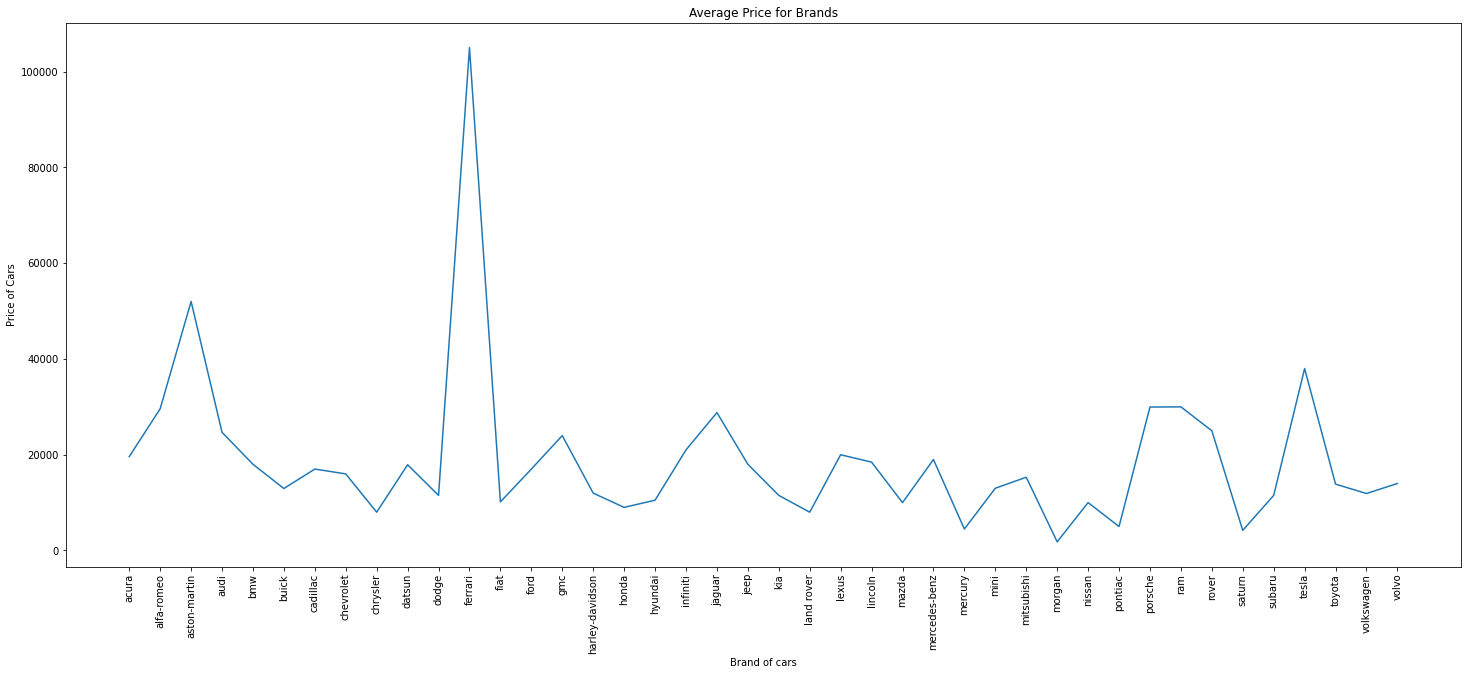

CPU times: total: 656 ms
Wall time: 1.19 s


In [12]:
%%time
_,ax=plt.subplots(1,1,figsize=(25,10))
ax.ticklabel_format(useOffset=False,style='plain')
ax.plot(median_prices_brand)
plt.xticks(rotation='vertical')
plt.title("Average Price for Brands")
plt.xlabel('Brand of cars')
plt.ylabel('Price of Cars')
plt.show()

#### Checking Price variations w.r.t Fuel Type

In [13]:
%%time
data.fuel.unique()  # Checking unique fuel types

CPU times: total: 15.6 ms
Wall time: 26 ms


array([nan, 'gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [14]:
%%time
data.fuel.isnull().sum()   # chcking no of rows having null values

CPU times: total: 15.6 ms
Wall time: 18.9 ms


2594

In [15]:
%%time
data.fuel.dropna(inplace=True)   # dropping the null values

CPU times: total: 31.2 ms
Wall time: 22.9 ms


In [16]:
%%time
data.fuel.unique()   # checking for remaining unique values

CPU times: total: 15.6 ms
Wall time: 24.9 ms


array([nan, 'gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [17]:
%%time
# Grouping the data and using median to not be affected by Outliers
# using median as mean results in outlier
median_prices_fuel = data.groupby(['fuel'])['price'].median() 

CPU times: total: 78.1 ms
Wall time: 72.8 ms


#### Plotting Price v/s Fuel Type

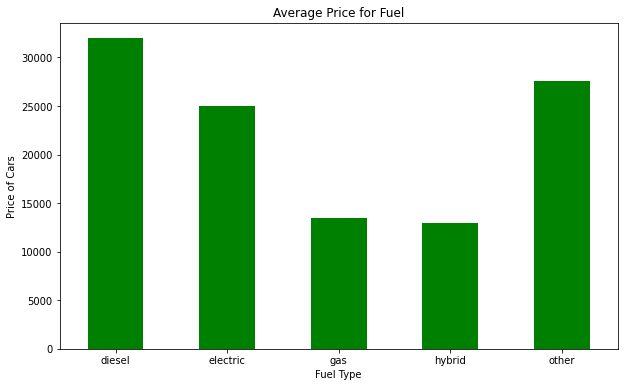

CPU times: total: 172 ms
Wall time: 281 ms


In [18]:
%%time
median_prices_fuel.plot.bar(figsize=(10,6),color='green')
plt.xticks(rotation='horizontal')
plt.title("Average Price for Fuel")
plt.xlabel('Fuel Type')
plt.ylabel('Price of Cars')
plt.show()

#### Checking Price variations w.r.t Transmission Type

In [19]:
%%time
data.transmission.unique()  # checking unique values of transmission

CPU times: total: 15.6 ms
Wall time: 20.9 ms


array([nan, 'other', 'automatic', 'manual'], dtype=object)

In [20]:
%%time
data.transmission.isnull().sum()  # checking number of rows having null values 

CPU times: total: 15.6 ms
Wall time: 18 ms


1823

In [21]:
%%time
data.transmission.dropna(inplace=True)   # dropping rows with null values

CPU times: total: 31.2 ms
Wall time: 26.9 ms


In [22]:
%%time
data.transmission.unique()

CPU times: total: 31.2 ms
Wall time: 23.9 ms


array([nan, 'other', 'automatic', 'manual'], dtype=object)

In [23]:
%%time
# Grouping data by Tranmission and calculating median price of each type of transmission
# using median as mean results in outlier
median_prices_transmission = data.groupby(['transmission'])['price'].median() 

CPU times: total: 46.9 ms
Wall time: 57.8 ms


#### Plotting Price v/s Transmission Type

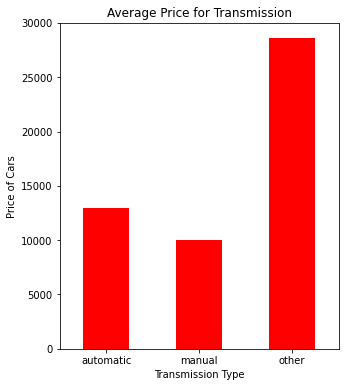

CPU times: total: 125 ms
Wall time: 133 ms


In [24]:
%%time
median_prices_transmission.plot.bar(figsize=(5,6),color='red')
plt.xticks(rotation='horizontal')
plt.title("Average Price for Transmission")
plt.xlabel('Transmission Type')
plt.ylabel('Price of Cars')
plt.show()

### Data Cleaning Operations on Price : Removing Outliers

In [25]:
%%time
data.price.describe()

CPU times: total: 15.6 ms
Wall time: 20.9 ms


count    3.939850e+05
mean     8.147763e+04
std      1.268064e+07
min      1.000000e+00
25%      7.000000e+03
50%      1.500000e+04
75%      2.759000e+04
max      3.736929e+09
Name: price, dtype: float64

In [26]:
%%time
## checking the max and min of the price after removal of 0 previously
print(data.price.min())
print(data.price.max())

1
3736928711
CPU times: total: 0 ns
Wall time: 1.99 ms


In [27]:
%%time
## the top 20 most prices used through out
print ("Top 20 most used price points:")
print (data.price.value_counts().iloc[:20])

Top 20 most used price points:
6995     3169
7995     3129
9995     2867
8995     2837
4500     2778
5995     2727
3500     2716
29990    2705
6500     2594
5500     2584
10995    2390
7500     2351
25990    2320
27990    2228
2500     2204
4995     2190
26990    2112
11995    2112
12995    2109
14995    2103
Name: price, dtype: int64
CPU times: total: 15.6 ms
Wall time: 72.8 ms


Now According to many data available on google, we can say that the price of a used car can be max 150000 Dollars depending on cars like Ferarri, Lamborghini, but i would still keep it till 200000 Dollars. And lowest being 100 Dollars.

In [28]:
%time
data.drop(data[(data.price > 200000) | (data.price < 100)].index,inplace=True)

CPU times: total: 0 ns
Wall time: 0 ns


In [29]:
%%time
data.shape

CPU times: total: 0 ns
Wall time: 0 ns


(390534, 26)

In [30]:
%%time
data.price.describe()

CPU times: total: 46.9 ms
Wall time: 25 ms


count    390534.000000
mean      19026.913646
std       15056.080808
min         100.000000
25%        7495.000000
50%       15500.000000
75%       27900.000000
max      200000.000000
Name: price, dtype: float64

#### Plotting the price ranges with Box Plot

CPU times: total: 359 ms
Wall time: 1.37 s


<AxesSubplot:ylabel='price'>

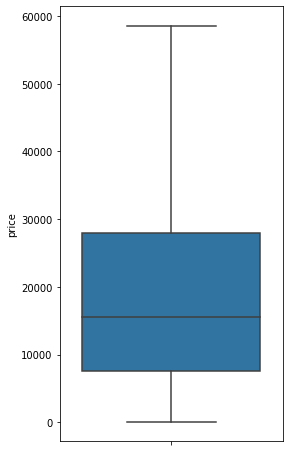

In [31]:
%%time
plt.figure(figsize=(4,8))
sns.boxplot(y='price', data=data,showfliers=False);

#### Checking Price variations w.r.t State

In [32]:
%%time
data.state.unique()   # checking unique state values

CPU times: total: 15.6 ms
Wall time: 87.9 ms


array(['az', 'ar', 'fl', 'ma', 'nc', 'ny', 'or', 'pa', 'wa', 'wi', 'al',
       'ak', 'ca', 'co', 'ct', 'dc', 'de', 'ga', 'hi', 'id', 'il', 'in',
       'ia', 'ks', 'ky', 'la', 'me', 'md', 'mi', 'mn', 'ms', 'mo', 'mt',
       'ne', 'nv', 'nj', 'nm', 'nh', 'nd', 'oh', 'ok', 'ri', 'sc', 'sd',
       'tn', 'tx', 'ut', 'vt', 'va', 'wv', 'wy'], dtype=object)

In [33]:
%%time
## grouping values using state and calculaing the median of each state
# using median as mean results in outlier
median_prices_state = data.groupby(['state'])['price'].median() 

CPU times: total: 31.2 ms
Wall time: 39.9 ms


#### Plotting Price v/s State 

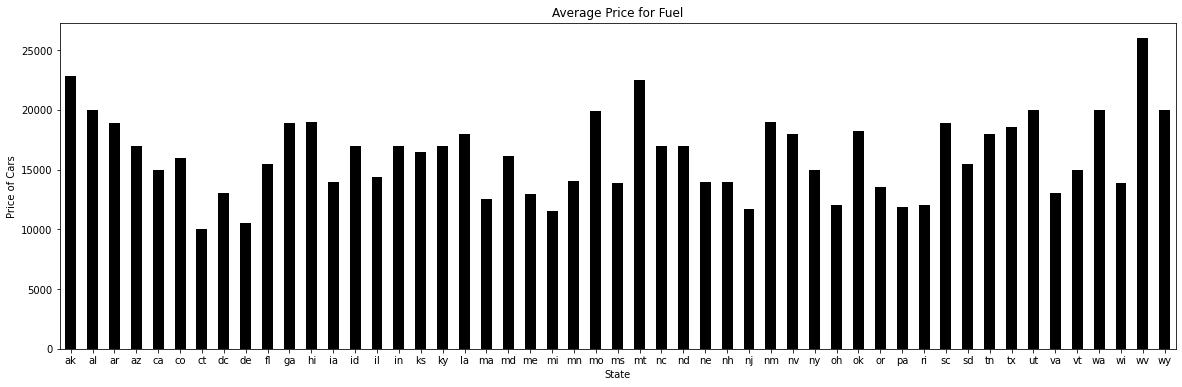

CPU times: total: 609 ms
Wall time: 607 ms


In [34]:
%%time
median_prices_state.plot.bar(figsize=(20,6),color='black')
plt.xticks(rotation='horizontal')
plt.title("Average Price for Fuel")
plt.xlabel('State')
plt.ylabel('Price of Cars')
plt.show()

#### Getting the top 20 states where most cars have been sold 

In [35]:
%%time
print ('Top 20 state where cars are sold most:')
print (data['state'].value_counts().iloc[:20])

Top 20 state where cars are sold most:
ca    45135
fl    26231
tx    21175
ny    17846
oh    16591
mi    16371
or    14136
pa    12871
nc    12670
wa    12435
wi    11123
tn    10477
co    10375
il     9860
nj     9290
va     8725
id     8207
az     8197
ia     8095
ma     7799
Name: state, dtype: int64
CPU times: total: 31.2 ms
Wall time: 127 ms


#### Plotting States v/s Count of Sales 

CPU times: total: 297 ms
Wall time: 381 ms


Text(0.5, 1.0, 'State vs No.Of Sales')

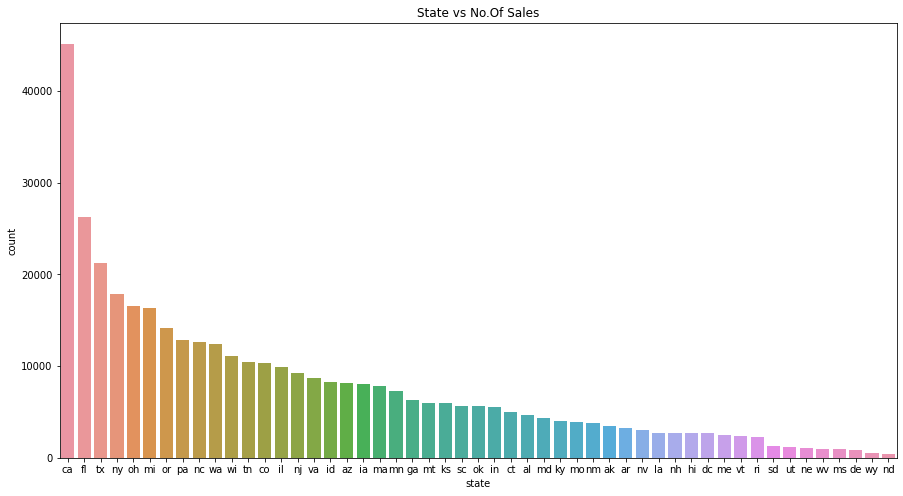

In [36]:
%%time
plt.figure(figsize=(15,8))
ax = sns.countplot(x='state',data=data,order=data['state'].value_counts().index);
plt.title('State vs No.Of Sales')

#### Year : Data Visualization 

In [37]:
%%time
data.year.unique()   ## checking unique values of year

CPU times: total: 0 ns
Wall time: 87 ms


array([  nan, 2014., 2010., 2020., 2017., 2013., 2012., 2016., 2019.,
       2011., 1992., 2018., 2004., 2015., 2001., 2006., 1968., 2003.,
       2008., 2007., 2005., 1966., 2009., 1998., 2002., 1999., 2021.,
       1997., 1976., 1969., 1995., 1978., 1954., 1979., 1970., 1974.,
       1996., 1987., 2000., 1955., 1991., 1972., 1988., 1994., 1929.,
       1984., 1986., 1989., 1973., 1946., 1933., 1958., 1937., 1985.,
       1957., 1953., 1942., 1963., 1977., 1993., 1990., 1965., 1982.,
       1948., 1983., 1936., 1932., 1951., 1931., 1980., 1967., 1971.,
       1947., 1981., 1926., 1962., 1975., 1964., 1934., 1952., 1940.,
       1959., 1950., 1930., 1956., 1960., 1922., 1928., 2022., 1901.,
       1941., 1924., 1927., 1939., 1923., 1949., 1961., 1935., 1918.,
       1938., 1900., 1913., 1916., 1943., 1925., 1921., 1915., 1945.,
       1905., 1920., 1944., 1910., 1909.])

In [38]:
%%time
data.year.isnull().sum()   ## checking no. of rows with null year

CPU times: total: 0 ns
Wall time: 998 µs


1173

In [39]:
%%time
data.drop(data[(data.year <= 0) | (data.price.isnull())].index,inplace=True)   # dropping year that is either 0 or null

CPU times: total: 141 ms
Wall time: 209 ms


In [40]:
%%time
data.shape

CPU times: total: 0 ns
Wall time: 0 ns


(390534, 26)

#### Getting top 10 years of sale 

In [41]:
%%time
print ('Top 10 Year where selling was most:')
print (data['year'].value_counts().iloc[:10])

Top 10 Year where selling was most:
2017.0    32194
2018.0    32181
2013.0    28014
2015.0    27691
2016.0    27151
2014.0    26695
2019.0    22700
2012.0    22181
2011.0    18944
2020.0    17676
Name: year, dtype: int64
CPU times: total: 15.6 ms
Wall time: 51.6 ms


#### Plotting Year v/s Per Year Sale 

CPU times: total: 312 ms
Wall time: 312 ms


Text(0.5, 1.0, 'Year vs No.Of Sales')

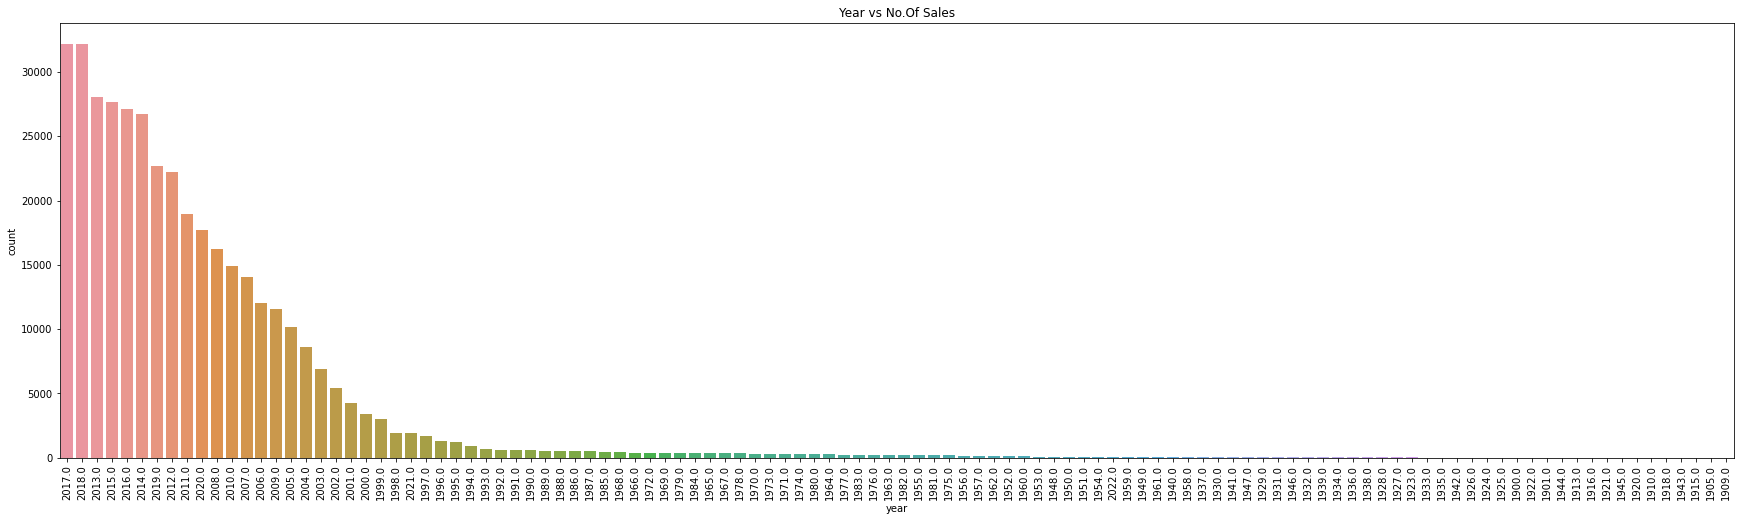

In [42]:
%%time
plt.figure(figsize=(30,8))
ax = sns.countplot(x='year',data=data,order=data['year'].value_counts().index);
plt.xticks(rotation='vertical')
plt.title('Year vs No.Of Sales')

We can see that the sales decreses as we move towards the past, it decreases after 1960 hence we will only keep data above 1960 

In [43]:
%%time
data.drop(data[(data.year < 1960)].index,inplace=True)   ## dropping data below 1960

CPU times: total: 156 ms
Wall time: 155 ms


In [44]:
%%time
data.shape

CPU times: total: 0 ns
Wall time: 0 ns


(388225, 26)

# Data Cleaning : 

In [45]:
%%time
data.columns

CPU times: total: 0 ns
Wall time: 0 ns


Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [46]:
%%time
data.head(2)

CPU times: total: 0 ns
Wall time: 0 ns


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN


### Dropping Columns

In [47]:
%%time
drop_columns = ['id','url','region_url','VIN','image_url','region','title_status', 'size','lat','long','description','county','posting_date']
data.drop(columns=drop_columns,inplace=True)

CPU times: total: 31.2 ms
Wall time: 32.9 ms


In [48]:
%%time
data.head(2)

CPU times: total: 0 ns
Wall time: 0 ns


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar


####  Checking the total null values we had in the whole data set

In [49]:
%%time
data.isnull().sum()

CPU times: total: 531 ms
Wall time: 587 ms


price                0
year              1173
manufacturer     15325
model             4187
condition       148827
cylinders       157765
fuel              2590
odometer          2279
transmission      1814
drive           118005
type             83274
paint_color     114723
state                0
dtype: int64

#### Dropping the Null values and checking the total rows we dropped 

In [50]:
%%time
rows_existing = data.shape[0]
data.dropna(inplace=True)
rows_new = data.shape[0]

print('Total Number of rows Dropped for Null : ',(rows_existing-rows_new))

Total Number of rows Dropped for Null :  278212
CPU times: total: 609 ms
Wall time: 729 ms


In [51]:
%%time
print('Total No. of rows Dropped till now : ',(total_rows - rows_new))

Total No. of rows Dropped till now :  316867
CPU times: total: 0 ns
Wall time: 0 ns


In [52]:
%%time
data.shape

CPU times: total: 0 ns
Wall time: 0 ns


(110013, 13)

In [131]:
data.to_csv("final.csv",index=False)

In [53]:
%%time
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110013 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         110013 non-null  int64  
 1   year          110013 non-null  float64
 2   manufacturer  110013 non-null  object 
 3   model         110013 non-null  object 
 4   condition     110013 non-null  object 
 5   cylinders     110013 non-null  object 
 6   fuel          110013 non-null  object 
 7   odometer      110013 non-null  float64
 8   transmission  110013 non-null  object 
 9   drive         110013 non-null  object 
 10  type          110013 non-null  object 
 11  paint_color   110013 non-null  object 
 12  state         110013 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 11.8+ MB
CPU times: total: 328 ms
Wall time: 425 ms


## Splitting the data into Train and Test 

In [54]:
%%time
X = data.drop(columns=['price'])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

CPU times: total: 31.2 ms
Wall time: 143 ms


In [55]:
%%time
print(X_train.shape)
print(X_test.shape)

(88010, 12)
(22003, 12)
CPU times: total: 0 ns
Wall time: 0 ns


In [56]:
%%time
X_train.columns

CPU times: total: 0 ns
Wall time: 0 ns


Index(['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'drive', 'type', 'paint_color', 'state'],
      dtype='object')

In [57]:
%%time
train_year = X_train.year
train_manufacturer = X_train.manufacturer
train_model = X_train.model
train_condition = X_train.condition
train_cylinders = X_train.cylinders
train_fuel = X_train.fuel
train_odometer = X_train.odometer
train_transmission = X_train.transmission
train_drive = X_train.drive
train_type = X_train.type
train_paint_color = X_train.paint_color
train_state = X_train.state

CPU times: total: 0 ns
Wall time: 0 ns


In [58]:
%%time
test_year = X_test.year
test_manufacturer = X_test.manufacturer
test_model = X_test.model
test_condition = X_test.condition
test_cylinders = X_test.cylinders
test_fuel = X_test.fuel
test_odometer = X_test.odometer
test_transmission = X_test.transmission
test_drive = X_test.drive
test_type = X_test.type
test_paint_color = X_test.paint_color
test_state = X_test.state

CPU times: total: 0 ns
Wall time: 998 µs


## Data Pre-Processing : 

### Manufacturer : 

In [59]:
%%time
train_manufacturer.unique()

CPU times: total: 0 ns
Wall time: 5.98 ms


array(['volkswagen', 'ford', 'mitsubishi', 'chrysler', 'porsche', 'lexus',
       'bmw', 'toyota', 'nissan', 'gmc', 'infiniti', 'buick', 'jaguar',
       'acura', 'honda', 'ram', 'chevrolet', 'audi', 'jeep', 'hyundai',
       'mercedes-benz', 'dodge', 'pontiac', 'mazda', 'kia', 'rover',
       'volvo', 'lincoln', 'subaru', 'cadillac', 'saturn', 'mercury',
       'fiat', 'mini', 'ferrari', 'alfa-romeo', 'datsun',
       'harley-davidson', 'tesla', 'land rover', 'aston-martin'],
      dtype=object)

####  One-Hot Encoding :

In [60]:
%%time
manufacturer_onehot_encoder = OneHotEncoder(handle_unknown='ignore')
x_manu_oneHot_train = manufacturer_onehot_encoder.fit_transform(train_manufacturer.values.reshape(-1,1))
x_manu_oneHot_test = manufacturer_onehot_encoder.transform(test_manufacturer.values.reshape(-1,1))

CPU times: total: 31.2 ms
Wall time: 35.1 ms


In [61]:
%%time
manufacturer_onehot_encoder.categories_

CPU times: total: 0 ns
Wall time: 0 ns


[array(['acura', 'alfa-romeo', 'aston-martin', 'audi', 'bmw', 'buick',
        'cadillac', 'chevrolet', 'chrysler', 'datsun', 'dodge', 'ferrari',
        'fiat', 'ford', 'gmc', 'harley-davidson', 'honda', 'hyundai',
        'infiniti', 'jaguar', 'jeep', 'kia', 'land rover', 'lexus',
        'lincoln', 'mazda', 'mercedes-benz', 'mercury', 'mini',
        'mitsubishi', 'nissan', 'pontiac', 'porsche', 'ram', 'rover',
        'saturn', 'subaru', 'tesla', 'toyota', 'volkswagen', 'volvo'],
       dtype=object)]

In [62]:
%%time
print(x_manu_oneHot_train.shape)
print(x_manu_oneHot_test.shape)

(88010, 41)
(22003, 41)
CPU times: total: 0 ns
Wall time: 0 ns


In [63]:
import pickle

In [64]:
filename = "manufacturer_onehot_encoder"
pickle.dump(manufacturer_onehot_encoder,open(filename,'wb'))

###  Model :

In [65]:
%%time
len(train_model.unique())

CPU times: total: 31.2 ms
Wall time: 22.9 ms


9817

In [66]:
%%time
train_model.value_counts()

CPU times: total: 31.2 ms
Wall time: 19.9 ms


f-150                      1351
silverado 1500             1161
1500                        745
camry                       702
accord                      659
                           ... 
villager estate edition       1
silverado hd2500              1
rx 350 sport utility          1
charger r/t srt               1
qx80 rwd                      1
Name: model, Length: 9817, dtype: int64

####  Frequency Encoding :

In [67]:
%%time
dict_model_freq = dict(Counter(train_model))
x_model_freq_train = train_model.replace(dict_model_freq).values.reshape(-1,1)

CPU times: total: 1min 45s
Wall time: 1min 45s


In [68]:
%%time
#we use map to replace values not present in dictionary with Nan
x_model_freq_test = test_model.map(dict_model_freq).fillna(0).astype('int64').values.reshape(-1,1)

CPU times: total: 46.9 ms
Wall time: 80.8 ms


In [69]:
%%time
print(x_model_freq_train.shape)
print(x_model_freq_test.shape)

(88010, 1)
(22003, 1)
CPU times: total: 0 ns
Wall time: 0 ns


In [70]:
filename = "dict_model_freq"
pickle.dump(dict_model_freq,open(filename,'wb'))

###  Condition :

In [71]:
%%time
train_condition.unique()

CPU times: total: 0 ns
Wall time: 6.98 ms


array(['good', 'excellent', 'like new', 'fair', 'new', 'salvage'],
      dtype=object)

#### One-Hot Encoding : 

In [72]:
%%time
condition_onehot_encoder = OneHotEncoder(handle_unknown='ignore')
x_condition_oneHot_train = condition_onehot_encoder.fit_transform(train_condition.values.reshape(-1,1))
x_condition_oneHot_test = condition_onehot_encoder.transform(test_condition.values.reshape(-1,1))

CPU times: total: 46.9 ms
Wall time: 41.9 ms


In [73]:
%%time
print(x_condition_oneHot_train.shape)
print(x_condition_oneHot_test.shape)

(88010, 6)
(22003, 6)
CPU times: total: 0 ns
Wall time: 0 ns


In [74]:
filename = "condition_onehot_encoder"
pickle.dump(condition_onehot_encoder,open(filename,'wb'))

###  Cylinder Types :

In [75]:
%%time
train_cylinders.unique()

CPU times: total: 31.2 ms
Wall time: 7.98 ms


array(['4 cylinders', '6 cylinders', '10 cylinders', '8 cylinders',
       '5 cylinders', '3 cylinders', 'other', '12 cylinders'],
      dtype=object)

### Value Encoding : Manual 

In [76]:
%%time
cylinders_dict = {
    '4 cylinders':4, 
    '6 cylinders':6, 
    '8 cylinders':8, 
    '10 cylinders':10,
    '5 cylinders':5, 
    '3 cylinders':3, 
    'other':0, 
    '12 cylinders':12
}

CPU times: total: 0 ns
Wall time: 0 ns


In [77]:
%%time
x_cylinders_freq_train = train_cylinders.replace(cylinders_dict).values.reshape(-1,1)
x_cylinders_freq_test = test_cylinders.replace(cylinders_dict).values.reshape(-1,1)

CPU times: total: 93.8 ms
Wall time: 105 ms


In [78]:
%%time
print(x_cylinders_freq_train.shape)
print(x_cylinders_freq_test.shape)

(88010, 1)
(22003, 1)
CPU times: total: 0 ns
Wall time: 997 µs


In [79]:
filename = "cylinders_dict"
pickle.dump(cylinders_dict,open(filename,'wb'))

### Fuel Type :¶ 

In [80]:
%%time
train_fuel.unique()

CPU times: total: 15.6 ms
Wall time: 5.98 ms


array(['gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

### One Hot Encoder :

In [81]:
%%time
fuel_onehot_encoder = OneHotEncoder(handle_unknown='ignore')
x_fuel_oneHot_train = fuel_onehot_encoder.fit_transform(train_fuel.values.reshape(-1,1))
x_fuel_oneHot_test = fuel_onehot_encoder.transform(test_fuel.values.reshape(-1,1))

CPU times: total: 46.9 ms
Wall time: 40.9 ms


In [82]:
%%time
print(x_fuel_oneHot_train.shape)
print(x_fuel_oneHot_test.shape)

(88010, 5)
(22003, 5)
CPU times: total: 0 ns
Wall time: 0 ns


In [83]:
filename = "fuel_onehot_encoder"
pickle.dump(fuel_onehot_encoder,open(filename,'wb'))

### Transmission Type 

In [84]:
%%time
train_transmission.unique()

CPU times: total: 15.6 ms
Wall time: 8.01 ms


array(['automatic', 'manual', 'other'], dtype=object)

### One-Hot Encoding : 

In [85]:
%%time
transmission_onehot_encoder = OneHotEncoder(handle_unknown='ignore')
x_transmission_oneHot_train = transmission_onehot_encoder.fit_transform(train_transmission.values.reshape(-1,1))
x_transmission_oneHot_test = transmission_onehot_encoder.transform(test_transmission.values.reshape(-1,1))

CPU times: total: 62.5 ms
Wall time: 47.9 ms


In [86]:
%%time
print(x_transmission_oneHot_train.shape)
print(x_transmission_oneHot_test.shape)

(88010, 3)
(22003, 3)
CPU times: total: 0 ns
Wall time: 0 ns


In [87]:
filename = "transmission_onehot_encoder"
pickle.dump(transmission_onehot_encoder,open(filename,'wb'))

### Drive Type : 

In [88]:
%%time
train_drive.unique()

CPU times: total: 0 ns
Wall time: 6.98 ms


array(['4wd', 'rwd', 'fwd'], dtype=object)

###  One-Hot Encoder :

In [89]:
%%time
drive_onehot_encoder = OneHotEncoder(handle_unknown='ignore')
x_drive_oneHot_train = drive_onehot_encoder.fit_transform(train_drive.values.reshape(-1,1))
x_drive_oneHot_test = drive_onehot_encoder.transform(test_drive.values.reshape(-1,1))
print(x_drive_oneHot_train.shape)
print(x_drive_oneHot_test.shape)

(88010, 3)
(22003, 3)
CPU times: total: 46.9 ms
Wall time: 44.9 ms


In [90]:
filename = "drive_onehot_encoder"
pickle.dump(drive_onehot_encoder,open(filename,'wb'))

###  Car Type :

In [91]:
%%time
train_type.unique()

CPU times: total: 0 ns
Wall time: 8.98 ms


array(['SUV', 'pickup', 'truck', 'sedan', 'convertible', 'mini-van',
       'hatchback', 'coupe', 'wagon', 'offroad', 'other', 'van', 'bus'],
      dtype=object)

### One-Hot Encoder : 

In [92]:
%%time
type_onehot_encoder = OneHotEncoder(handle_unknown='ignore')
x_type_oneHot_train = type_onehot_encoder.fit_transform(train_type.values.reshape(-1,1))
x_type_oneHot_test = type_onehot_encoder.transform(test_type.values.reshape(-1,1))
print(x_type_oneHot_train.shape)
print(x_type_oneHot_test.shape)

(88010, 13)
(22003, 13)
CPU times: total: 46.9 ms
Wall time: 41.9 ms


In [93]:
filename = "cartype_onehot_encoder"
pickle.dump(type_onehot_encoder,open(filename,'wb'))

### Paint : 

In [94]:
%%time
train_paint_color.unique()

CPU times: total: 0 ns
Wall time: 6.98 ms


array(['red', 'white', 'blue', 'grey', 'black', 'silver', 'green',
       'brown', 'custom', 'yellow', 'orange', 'purple'], dtype=object)

### Ordinal Encoder : 

In [95]:
%%time
paint_color_ordinal_encoder = OrdinalEncoder()
x_paint_color_ordinal_train = paint_color_ordinal_encoder.fit_transform(train_paint_color.values.reshape(-1,1))
x_paint_color_ordinal_test = paint_color_ordinal_encoder.transform(test_paint_color.values.reshape(-1,1))
print(x_paint_color_ordinal_train.shape)
print(x_paint_color_ordinal_test.shape)

(88010, 1)
(22003, 1)
CPU times: total: 62.5 ms
Wall time: 44.9 ms


In [96]:
filename = "paint_color_ordinal_encoder"
pickle.dump(paint_color_ordinal_encoder,open(filename,'wb'))

### State : 

In [97]:
%%time
train_state.unique()

CPU times: total: 15.6 ms
Wall time: 6.02 ms


array(['me', 'nc', 'nj', 'ia', 'id', 'ks', 'md', 'ca', 'mn', 'tx', 'or',
       'ma', 'in', 'vt', 'ky', 'oh', 'al', 'wi', 'mo', 'nv', 'ny', 'nm',
       'sd', 'az', 'fl', 'wy', 'mi', 'tn', 'ga', 'va', 'co', 'ct', 'ri',
       'wa', 'hi', 'dc', 'pa', 'ok', 'ar', 'nh', 'sc', 'wv', 'il', 'ak',
       'mt', 'ut', 'de', 'la', 'ne', 'ms', 'nd'], dtype=object)

### Ordinal Encoder :

In [98]:
%%time
state_ordinal_encoder = OrdinalEncoder()
x_state_ordinal_train = state_ordinal_encoder.fit_transform(train_state.values.reshape(-1,1))
x_state_ordinal_test = state_ordinal_encoder.transform(test_state.values.reshape(-1,1))
print(x_state_ordinal_train.shape)
print(x_state_ordinal_test.shape)

(88010, 1)
(22003, 1)
CPU times: total: 31.2 ms
Wall time: 37.9 ms


In [99]:
filename = "state_ordinal_encoder"
pickle.dump(state_ordinal_encoder,open(filename,'wb'))

In [100]:
%%time
y.dtype

CPU times: total: 0 ns
Wall time: 0 ns


dtype('int64')

In [101]:
%%time
print(train_year.values.reshape(-1,1).shape)
print(x_manu_oneHot_train.shape)
print(x_model_freq_train.shape)
print(x_condition_oneHot_train.shape)
print(x_cylinders_freq_train.shape)
print(x_fuel_oneHot_train.shape)
print(train_odometer.values.reshape(-1,1).shape)
print(x_transmission_oneHot_train.shape)
print(x_drive_oneHot_train.shape)
print(x_type_oneHot_train.shape)
print(x_paint_color_ordinal_train.shape)
print(x_state_ordinal_train.shape)

(88010, 1)
(88010, 41)
(88010, 1)
(88010, 6)
(88010, 1)
(88010, 5)
(88010, 1)
(88010, 3)
(88010, 3)
(88010, 13)
(88010, 1)
(88010, 1)
CPU times: total: 0 ns
Wall time: 0 ns


## Standardizing the Data 

In [129]:
%%time
# save year standard scalar
scalar = StandardScaler()
train_year_scaled = scalar.fit_transform(train_year.values.reshape(-1,1))
test_year_scaled = scalar.transform(test_year.values.reshape(-1,1))
print(test_year_scaled)

[[ 0.86509914]
 [ 0.26923686]
 [-0.08828051]
 ...
 [ 0.1500644 ]
 [ 0.50758177]
 [-0.56497033]]
CPU times: total: 125 ms
Wall time: 428 ms


In [103]:
filename = "year_scaler"
pickle.dump(scalar,open(filename,'wb'))

In [130]:
%%time
scalar = StandardScaler()
train_odometer_scaled = scalar.fit_transform(train_odometer.values.reshape(-1,1))
test_odometer_scaled = scalar.transform(test_odometer.values.reshape(-1,1))
print(test_odometer_scaled)

[[-0.29299291]
 [ 0.1415941 ]
 [ 0.69731254]
 ...
 [ 0.26715048]
 [-0.23167573]
 [ 0.2480445 ]]
CPU times: total: 15.6 ms
Wall time: 26.9 ms


In [105]:
filename = "odometer_scaler"
pickle.dump(scalar,open(filename,'wb'))

## Combining All the Encoded Features : 

In [106]:
%%time
X_stack_train = hstack((train_year_scaled, x_manu_oneHot_train, x_model_freq_train, x_condition_oneHot_train, x_cylinders_freq_train, 
                      x_fuel_oneHot_train, train_odometer_scaled, x_transmission_oneHot_train, x_drive_oneHot_train, x_type_oneHot_train, 
                      x_paint_color_ordinal_train, x_state_ordinal_train))

CPU times: total: 93.8 ms
Wall time: 189 ms


In [107]:
%%time
X_stack_test = hstack((test_year_scaled, x_manu_oneHot_test, x_model_freq_test, x_condition_oneHot_test, x_cylinders_freq_test, 
                      x_fuel_oneHot_test, test_odometer_scaled, x_transmission_oneHot_test, x_drive_oneHot_test, x_type_oneHot_test, 
                      x_paint_color_ordinal_test, x_state_ordinal_test))

CPU times: total: 15.6 ms
Wall time: 20.9 ms


## Function to calculate R2 value, Relative Error & RMSE 

In [108]:
%%time
def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5

def acc_boosting(y_true,y_pred,num_iteration=0):
    # Calculation of accuracy of boosting model by different metrics
    
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    acc_test_r2_num = round(r2_score(y_true, y_pred) * 100, 2)
    print('acc(r2_score) =', acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(y_true, y_pred) * 100, 2)
    print('acc(relative error) =', acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(y_true, y_pred) * 100, 2)
    print('acc(rmse) =', acc_test_rmse_num)

def acc_model(y_true,y_pred):
    # Calculation of accuracy of model акщь Sklearn by different metrics   
  
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
 
    acc_test_r2_num = round(r2_score(y_true, y_pred) * 100, 2)
    print('acc(r2_score) =', acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(y_true, y_pred) * 100, 2)
    print('acc(relative error) =', acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(y_true, y_pred) * 100, 2)
    print('acc(rmse) =', acc_test_rmse_num)

CPU times: total: 0 ns
Wall time: 0 ns


#  Modeling :

## 1. Linear Regression :

In [253]:
%%time
model = LinearRegression(n_jobs=-1,normalize=True)
model.fit(X_stack_train, y_train)

CPU times: total: 375 ms
Wall time: 786 ms


LinearRegression(n_jobs=-1, normalize=True)

In [254]:
%%time
# define true and predicted response values
y_true_train = y_train
y_pred_train = model.predict(X_stack_train).astype('int64')
print("First Five Actual Value of Train : ",y_true_train.values[:5])
print("First Five Predicted Value of Train : ",y_pred_train[:5])
print('\n\n')
y_true_test = y_test
y_pred_test = model.predict(X_stack_test).astype('int64')
print("First Five Actual Value of Test : ",y_true_test.values[:5])
print("First Five Predicted Value of Test : ",y_pred_test[:5])

First Five Actual Value of Train :  [ 5200 36990 24990 16900 14000]
First Five Predicted Value of Train :  [ 8357 24835 25706 13185 34332]



First Five Actual Value of Test :  [ 7300  9995  4995 36590  5850]
First Five Predicted Value of Test :  [11028  7699  7123 45710  6283]
CPU times: total: 15.6 ms
Wall time: 19.9 ms


In [255]:
%%time
print('For Train Data')
acc_model(y_true_train,y_pred_train)
print('For Test Data')
acc_model(y_true_test,y_pred_test)

For Train Data
acc(r2_score) = 57.96
acc(relative error) = 35.23
acc(rmse) = 857399.22
For Test Data
acc(r2_score) = 53.72
acc(relative error) = 35.94
acc(rmse) = 922189.5
CPU times: total: 46.9 ms
Wall time: 70.8 ms


##  2. Support Vector Regressor :

In [108]:
%%time
model = SVR()
model.fit(X_stack_train, y_train)

CPU times: total: 15min 51s
Wall time: 16min 1s


SVR()

In [109]:
%%time
# define true and predicted response values
y_true_train = y_train
y_pred_train = model.predict(X_stack_train).astype('int64')
print("First Five Actual Value of Train : ",y_true_train.values[:5])
print("First Five Predicted Value of Train : ",y_pred_train[:5])
print('\n\n')
y_true_test = y_test
y_pred_test = model.predict(X_stack_test).astype('int64')
print("First Five Actual Value of Test : ",y_true_test.values[:5])
print("First Five Predicted Value of Test : ",y_pred_test[:5])

First Five Actual Value of Train :  [ 5200 36990 24990 16900 14000]
First Five Predicted Value of Train :  [11895 11856 11953 11815 11945]



First Five Actual Value of Test :  [ 7300  9995  4995 36590  5850]
First Five Predicted Value of Test :  [11916 11841 11968 11842 11951]
CPU times: total: 12min 2s
Wall time: 12min 6s


In [110]:
%%time
print('For Train Data')
acc_model(y_true_train,y_pred_train)
print('For Test Data')
acc_model(y_true_test,y_pred_test)

For Train Data
acc(r2_score) = -10.47
acc(relative error) = 60.82
acc(rmse) = 1389944.22
For Test Data
acc(r2_score) = -10.29
acc(relative error) = 61.26
acc(rmse) = 1423578.16
CPU times: total: 15.6 ms
Wall time: 25.9 ms


## 3. Linear Support Vector Regressor :

In [111]:
%%time
model = LinearSVR()
model.fit(X_stack_train, y_train)

CPU times: total: 12.2 s
Wall time: 12.5 s


LinearSVR()

In [112]:
%%time
# define true and predicted response values
y_true_train = y_train
y_pred_train = model.predict(X_stack_train).astype('int64')
print("First Five Actual Value of Train : ",y_true_train.values[:5])
print("First Five Predicted Value of Train : ",y_pred_train[:5])
print('\n\n')
y_true_test = y_test
y_pred_test = model.predict(X_stack_test).astype('int64')
print("First Five Actual Value of Test : ",y_true_test.values[:5])
print("First Five Predicted Value of Test : ",y_pred_test[:5])

First Five Actual Value of Train :  [ 5200 36990 24990 16900 14000]
First Five Predicted Value of Train :  [ 7089 25709 16977 17445 15379]



First Five Actual Value of Test :  [ 7300  9995  4995 36590  5850]
First Five Predicted Value of Test :  [12974  7513  4971 35314  5603]
CPU times: total: 0 ns
Wall time: 9.97 ms


In [113]:
%%time
print('For Train Data')
acc_model(y_true_train,y_pred_train)
print('For Test Data')
acc_model(y_true_test,y_pred_test)

For Train Data
acc(r2_score) = 37.42
acc(relative error) = 33.98
acc(rmse) = 1046156.44
For Test Data
acc(r2_score) = 12.71
acc(relative error) = 35.06
acc(rmse) = 1266494.53
CPU times: total: 15.6 ms
Wall time: 28.9 ms


## 4. MLP Regressor : 

In [109]:
%%time
model = MLPRegressor()
param_grid = {'hidden_layer_sizes': [i for i in range(2,10,2)],
              'activation': ['relu'],
              'solver': ['adam'],
              'learning_rate': ['adaptive'],
              'learning_rate_init': [0.001],
              'power_t': [0.5],
              'alpha': [0.0001],
              'max_iter': [500],
              'early_stopping': [True],
              'warm_start': [False]}
grid = GridSearchCV(model, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
grid.fit(X_stack_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
CPU times: total: 2min 50s
Wall time: 19min 23s


GridSearchCV(cv=5, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.0001],
                         'early_stopping': [True],
                         'hidden_layer_sizes': [2, 4, 6, 8],
                         'learning_rate': ['adaptive'],
                         'learning_rate_init': [0.001], 'max_iter': [500],
                         'power_t': [0.5], 'solver': ['adam'],
                         'warm_start': [False]},
             verbose=True)

In [110]:
%%time
model = MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5)
model.fit(X_stack_train, y_train)

CPU times: total: 3min 50s
Wall time: 4min 36s


MLPRegressor()

In [111]:
%%time
# define true and predicted response values
y_true_train = y_train
y_pred_train = model.predict(X_stack_train).astype('int64')
print("First Five Actual Value of Train : ",y_true_train.values[:5])
print("First Five Predicted Value of Train : ",y_pred_train[:5])
print('\n\n')
y_true_test = y_test
y_pred_test = model.predict(X_stack_test).astype('int64')
print("First Five Actual Value of Test : ",y_true_test.values[:5])
print("First Five Predicted Value of Test : ",y_pred_test[:5])

First Five Actual Value of Train :  [ 5200 36990 24990 16900 14000]
First Five Predicted Value of Train :  [ 4935 33770 24759 17799 31693]



First Five Actual Value of Test :  [ 7300  9995  4995 36590  5850]
First Five Predicted Value of Test :  [12569  8007  4146 53595  5163]
CPU times: total: 1.19 s
Wall time: 1.09 s


In [112]:
%%time
print('For Train Data')
acc_model(y_true_train,y_pred_train)
print('For Test Data')
acc_model(y_true_test,y_pred_test)

For Train Data
acc(r2_score) = 80.04
acc(relative error) = 21.96
acc(rmse) = 590818.31
For Test Data
acc(r2_score) = 77.22
acc(relative error) = 22.57
acc(rmse) = 646966.65
CPU times: total: 46.9 ms
Wall time: 85.3 ms


In [114]:
filename = "MLP_Regressor"
pickle.dump(model,open(filename,'wb'))

## 5. SGD Regressor : 

In [115]:
%%time
model = SGDRegressor(learning_rate='adaptive')
model.fit(X_stack_train, y_train)

CPU times: total: 1.47 s
Wall time: 1.71 s


SGDRegressor(learning_rate='adaptive')

In [117]:
%%time
# define true and predicted response values
y_true_train = y_train
y_pred_train = model.predict(X_stack_train).astype('int64')
print("First Five Actual Value of Train : ",y_true_train.values[:5])
print("First Five Predicted Value of Train : ",y_pred_train[:5])
print('\n\n')
y_true_test = y_test
y_pred_test = model.predict(X_stack_test).astype('int64')
print("First Five Actual Value of Test : ",y_true_test.values[:5])
print("First Five Predicted Value of Test : ",y_pred_test[:5])

First Five Actual Value of Train :  [ 5200 36990 24990 16900 14000]
First Five Predicted Value of Train :  [-15295100280  19608489329 -24635138239 -11849390197 -18331408633]



First Five Actual Value of Test :  [ 7300  9995  4995 36590  5850]
First Five Predicted Value of Test :  [20094692005 -5850147817  2713336155  5983299931  4522529769]
CPU times: total: 31.2 ms
Wall time: 35.9 ms


In [118]:
%%time
print('For Train Data')
acc_model(y_true_train,y_pred_train)
print('For Test Data')
acc_model(y_true_test,y_pred_test)

For Train Data
acc(r2_score) = -286127880934.2
acc(relative error) = 58726299.81
acc(rmse) = 70738257753.13
For Test Data
acc(r2_score) = -304093524658.16
acc(relative error) = 57618535.24
acc(rmse) = 74752292561.88
CPU times: total: 31.2 ms
Wall time: 30.9 ms


In [119]:
filename = "SGD_Regressor"
pickle.dump(model,open(filename,'wb'))

## 6. Decision Tree Regressor : 

In [125]:
%%time
model = DecisionTreeRegressor(splitter='random', max_features='auto')
model.fit(X_stack_train, y_train)

CPU times: total: 15 s
Wall time: 15.2 s


DecisionTreeRegressor(max_features='auto', splitter='random')

In [126]:
%%time
# define true and predicted response values
y_true_train = y_train
y_pred_train = model.predict(X_stack_train).astype('int64')
print("First Five Actual Value of Train : ",y_true_train.values[:5])
print("First Five Predicted Value of Train : ",y_pred_train[:5])
print('\n\n')
y_true_test = y_test
y_pred_test = model.predict(X_stack_test).astype('int64')
print("First Five Actual Value of Test : ",y_true_test.values[:5])
print("First Five Predicted Value of Test : ",y_pred_test[:5])

First Five Actual Value of Train :  [ 5200 36990 24990 16900 14000]
First Five Predicted Value of Train :  [ 5200 36990 24990 16900 14000]



First Five Actual Value of Test :  [ 7300  9995  4995 36590  5850]
First Five Predicted Value of Test :  [11900  6995  4500 36590  5850]
CPU times: total: 109 ms
Wall time: 99.8 ms


In [127]:
%%time
print('For Train Data')
acc_model(y_true_train,y_pred_train)
print('For Test Data')
acc_model(y_true_test,y_pred_test)

For Train Data
acc(r2_score) = 99.99
acc(relative error) = 0.05
acc(rmse) = 10414.1
For Test Data
acc(r2_score) = 79.35
acc(relative error) = 15.82
acc(rmse) = 616028.88
CPU times: total: 15.6 ms
Wall time: 25.9 ms


In [128]:
filename = "Decision_Tree_Regressor"
pickle.dump(model,open(filename,'wb'))

## 7. XGB Regressor :

In [120]:
%%time
xgb_clf = xgb.XGBRegressor({'objective': 'reg:squarederror'}) 
parameters = {'n_estimators': [60, 100, 120, 150], 
              'learning_rate': [0.001, 0.01, 0.1],
              'max_depth': [5, 10],
              'reg_lambda': [0.5],
              'n_jobs':[-1]}
grid = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=5, n_jobs=-1)
grid.fit(X_stack_train, y_train)

XGBoostError: [21:40:54] C:\Users\Administrator\workspace\xgboost-win64_release_1.5.1\src\objective\objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:pseudohubererror
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic


## 8. Light GBM : 

In [121]:
%%time
train_set = lgb.Dataset(X_stack_train, y_train, silent=False)
test_set = lgb.Dataset(X_stack_test, y_test, silent=False)
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'num_leaves': 31,
        'learning_rate': 0.01,
        'max_depth': -1,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': False,
        'seed':0,        
    }
model = lgb.train(params, train_set = train_set, num_boost_round=1000,
                   early_stopping_rounds=800,verbose_eval=500,  valid_sets=test_set, )

[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5480
[LightGBM] [Info] Number of data points in the train set: 88010, number of used features: 75
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] Start training from score 16090.394796
Training until validation scores don't improve for 800 rounds
[500]	valid_0's rmse: 5872.26
[1000]	valid_0's rmse: 5506.08
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 5506.08
CPU times: total: 34 s
Wall time: 9.44 s


In [122]:
%%time
# define true and predicted response values
y_true_train = y_train
y_pred_train = model.predict(X_stack_train).astype('int64')
print("First Five Actual Value of Train : ",y_true_train.values[:5])
print("First Five Predicted Value of Train : ",y_pred_train[:5])
print('\n\n')
y_true_test = y_test
y_pred_test = model.predict(X_stack_test).astype('int64')
print("First Five Actual Value of Test : ",y_true_test.values[:5])
print("First Five Predicted Value of Test : ",y_pred_test[:5])

First Five Actual Value of Train :  [ 5200 36990 24990 16900 14000]
First Five Predicted Value of Train :  [ 5824 36530 26687 18020 17623]



First Five Actual Value of Test :  [ 7300  9995  4995 36590  5850]
First Five Predicted Value of Test :  [12990  7699  5777 44691  5199]
CPU times: total: 17.5 s
Wall time: 4.64 s


In [123]:
%%time
print('For Train Data')
acc_model(y_true_train,y_pred_train)
print('For Test Data')
acc_model(y_true_test,y_pred_test)

For Train Data
acc(r2_score) = 86.96
acc(relative error) = 18.12
acc(rmse) = 477499.71
For Test Data
acc(r2_score) = 83.5
acc(relative error) = 18.93
acc(rmse) = 550607.76
CPU times: total: 46.9 ms
Wall time: 27.9 ms


In [124]:
filename = "LGBM_Regressor"
pickle.dump(model,open(filename,'wb'))

## Plotting the important features :

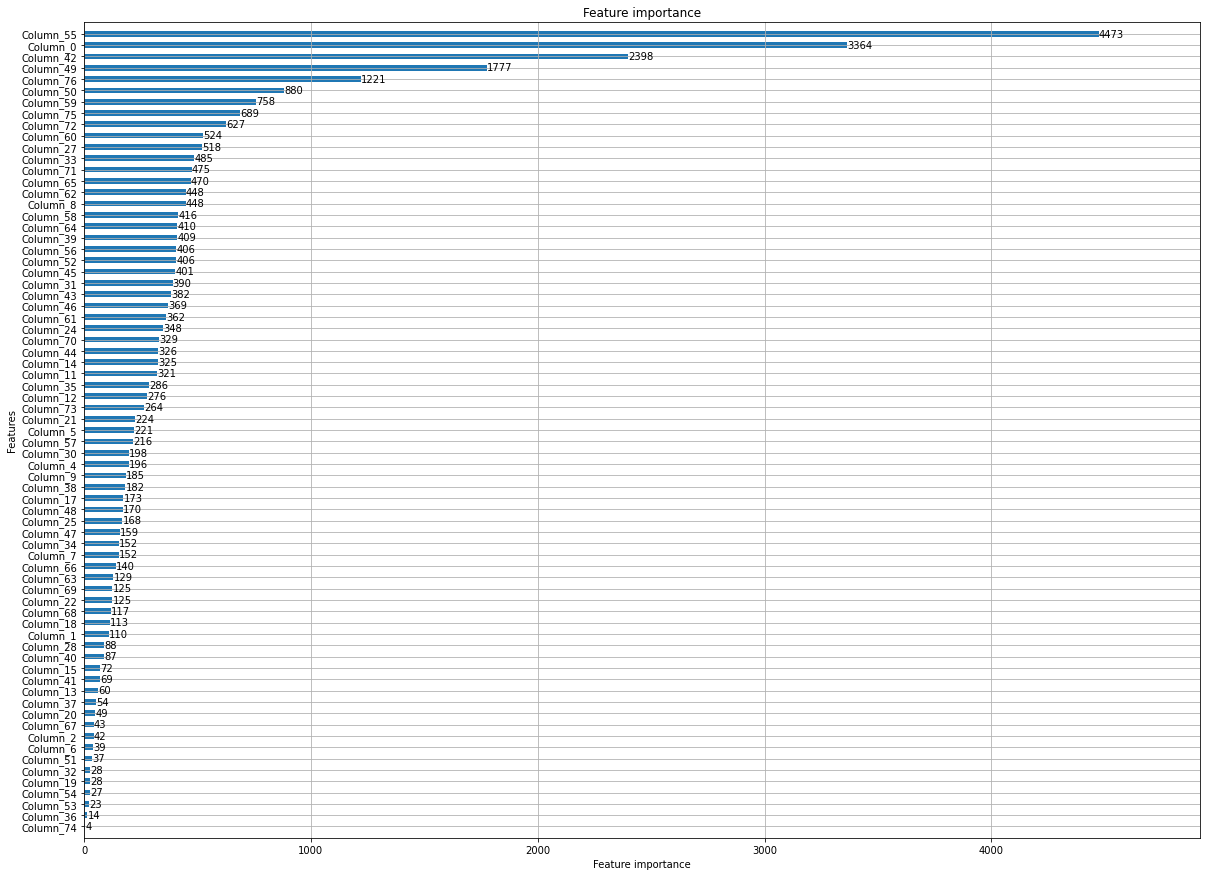

CPU times: total: 1.41 s
Wall time: 1.67 s


In [130]:
%%time
fig =  plt.figure(figsize = (20,15))
axes = fig.add_subplot(111)
lgb.plot_importance(model,ax = axes,height = 0.5)
plt.show();
plt.close()

##  Summarizing the Results of the Models :

In [131]:
x = PrettyTable()

x.field_names = ["Model Name", "Train R2 Score", "Train Relative Error", "Train RMSE", "Test R2 Score", "Test Relative Error", "Test RMSE"]

x.add_row(["Linear Regression", 51.28, 35.75, 699165.39, 51.39, 36.11, 693342.91])
x.add_row(["Support Vector Regressor", -8.85, 57.31, 1045067.31, -8.46, 57.38, 1035685.06])
x.add_row(["Linear Support Vector Regressor", 35.54, 33.91, 804175.36, 34.76, 34.08, 803239.29])
x.add_row(["MLP Regressor", 74.58, 22.65, 505042.37, 74.4, 22.98, 503142.45])
x.add_row(["SGD Regressor", -541746662852.12, 68561689.97, 73725901010.56, -544619576720.21, 69557750.71, 73390441004.45])
x.add_row(["MLP Regressor", 99.94, 0.16, 24394.21, 67.14, 18.66, 570063.77])
x.add_row(["XGB Regressor", 93.16, 13.2, 261974.97, 85.22, 16.74, 382354.26])
x.add_row(["LGBM Regressor", 81.58, 19.49, 429924.13, 79.82, 20.07, 446717.59])

print(x)

+---------------------------------+------------------+----------------------+----------------+------------------+---------------------+----------------+
|            Model Name           |  Train R2 Score  | Train Relative Error |   Train RMSE   |  Test R2 Score   | Test Relative Error |   Test RMSE    |
+---------------------------------+------------------+----------------------+----------------+------------------+---------------------+----------------+
|        Linear Regression        |      51.28       |        35.75         |   699165.39    |      51.39       |        36.11        |   693342.91    |
|     Support Vector Regressor    |      -8.85       |        57.31         |   1045067.31   |      -8.46       |        57.38        |   1035685.06   |
| Linear Support Vector Regressor |      35.54       |        33.91         |   804175.36    |      34.76       |        34.08        |   803239.29    |
|          MLP Regressor          |      74.58       |        22.65         |   50